In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

### [ISL] EX 14
This problem focuses on the collinearity problem.

In [20]:
np.random.seed(1)

In [2]:
x1 = np.sort(np.random.uniform(0, 1, (100)))
x2 = 0.5 * x1 + np.random.normal(0, 1, (100)) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(0, 1, (100))
data_frame = pd.DataFrame.from_dict({"x1": x1, "x2": x2, "y": y})

(a) **Write out the form of the linear model.
What are the regression coefficients?**

y = β0 + β1*x1 + β2*x2, β1 and β2

(b) **What is the correlation between x1 and x2? Create a scatterplot.**

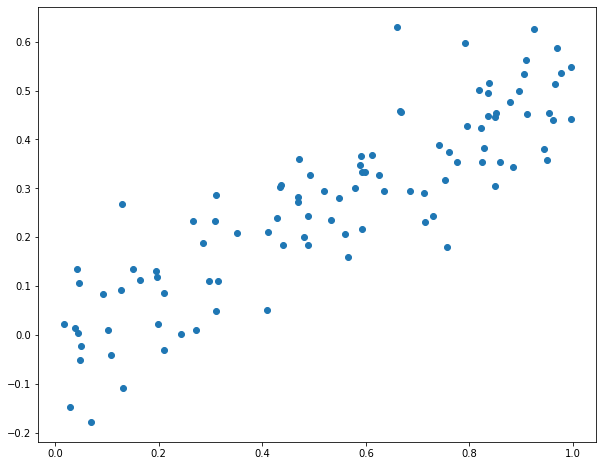

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, x2)

In [4]:
data_frame.corr()

,x1,x2,y
x1,1.000000,0.873817,0.627689
x2,0.873817,1.000000,0.576921
y,0.627689,0.576921,1.000000


(c) **Fit a least squares regression to predict y using
x1 and x2. Describe the results obtained.** 

**What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0?** 

**How about the null
hypothesis H0 : β2 = 0?**

In [5]:
fit_x12 = smf.ols(formula="y ~ x1 + x2", data=data_frame).fit()

In [6]:
print(fit_x12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     31.99
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.14e-11
Time:                        19:11:24   Log-Likelihood:                -147.73
No. Observations:                 100   AIC:                             301.5
Df Residuals:                      97   BIC:                             309.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6322      0.222      7.342      0.0

In [7]:
fit_x1 = smf.ols(formula="y ~ x1", data=data_frame).fit()

In [8]:
print(fit_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     63.71
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.77e-12
Time:                        19:11:24   Log-Likelihood:                -148.02
No. Observations:                 100   AIC:                             300.0
Df Residuals:                      98   BIC:                             305.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6165      0.221      7.321      0.0

In [9]:
fit_x2 = smf.ols(formula="y ~ x2", data=data_frame).fit()

In [10]:
print(fit_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     48.89
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           3.34e-10
Time:                        19:11:24   Log-Likelihood:                -152.82
No. Observations:                 100   AIC:                             309.6
Df Residuals:                      98   BIC:                             314.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9946      0.201      9.935      0.0

(g) **Now suppose we obtain one additional observation, which was
unfortunately mismeasured.**

In [11]:
x1_2 = np.append(x1, 0.1)
x2_2 = np.append(x2, 0.8)
y_2 = np.append(y, 6)
data_frame_2 = pd.DataFrame.from_dict({"x1": x1_2, "x2": x2_2, "y": y_2})

In [12]:
y_2

array([ 4.24581569, -0.05299032,  1.89545593,  2.28079647,  1.69347666,
        1.0429504 ,  1.73285973,  3.03347913,  0.73579776,  1.03348719,
        1.83187556,  2.79895648,  3.03840818,  1.57655454,  1.40808499,
        2.60721848,  2.41092891,  2.50926573,  3.84106033,  0.31734636,
        0.39101565,  3.38908713,  1.72953525,  1.98649923,  3.05013909,
        2.74384602,  1.45826944,  2.3537101 ,  0.90910959,  1.65660595,
        2.4134291 ,  3.02284752,  2.27195995,  3.83458196,  3.10250036,
        3.98128833,  2.79913803,  3.630205  ,  1.86351529,  3.94704504,
        2.19656873,  4.0072949 ,  4.21869546,  0.53717235,  4.2780866 ,
        3.00576327,  3.12110632,  5.26718684,  2.00859127,  3.52938235,
        3.78424983,  2.54135738,  4.15073014,  1.20257762,  2.5699878 ,
        2.09658244,  3.20642582,  2.84441514,  4.37106033,  4.15921659,
        3.61736547,  4.23514568,  4.0447313 ,  2.75198748,  5.05077176,
        3.27998446,  4.21200579,  4.29126002,  3.45234649,  3.08

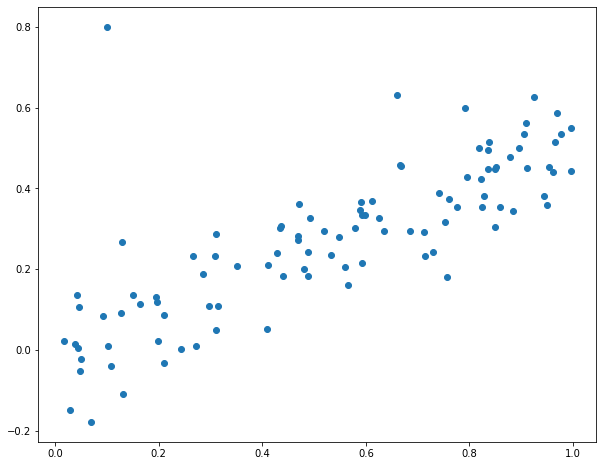

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1_2, x2_2)

In [14]:
fit_x12_2 = smf.ols(formula="y ~ x1 + x2", data=data_frame_2).fit()

In [15]:
print(fit_x12_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     31.09
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           3.50e-11
Time:                        19:11:24   Log-Likelihood:                -151.60
No. Observations:                 101   AIC:                             309.2
Df Residuals:                      98   BIC:                             317.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7349      0.223      7.770      0.0

In [16]:
fit_x1_2 = smf.ols(formula="y ~ x1", data=data_frame_2).fit()

In [17]:
print(fit_x1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     49.93
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.26e-10
Time:                        19:11:24   Log-Likelihood:                -155.79
No. Observations:                 101   AIC:                             315.6
Df Residuals:                      99   BIC:                             320.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7607      0.231      7.609      0.0

In [18]:
fit_x2_2 = smf.ols(formula="y ~ x2", data=data_frame_2).fit()

In [19]:
print(fit_x2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     55.38
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           3.69e-11
Time:                        19:11:24   Log-Likelihood:                -153.97
No. Observations:                 101   AIC:                             311.9
Df Residuals:                      99   BIC:                             317.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9775      0.197     10.042      0.0